In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
service=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/Vehicle Repair Dashboard/Service Record-Grid view (1).csv")

In [37]:
service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 30 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SL No.                                                    2337 non-null   int64  
 1   Registration Number                                       2335 non-null   object 
 2   Delivery Date (from Registration Number)                  2335 non-null   object 
 3   Current Vehicle Age in Months                             2335 non-null   float64
 4   Model                                                     2335 non-null   object 
 5   Hub                                                       2335 non-null   object 
 6   Date Sent                                                 2289 non-null   object 
 7   Date Received                                             2265 non-null   object 
 8   Received Month/Yea

In [38]:
service['Downtime'].describe()

count      2253.000000
mean       -589.554816
std       19822.962050
min     -665472.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         107.000000
Name: Downtime, dtype: float64

In [39]:
service=service[service['Downtime']>=0]

In [40]:
service['Downtime'].describe()

count    2236.000000
mean        1.355098
std         4.447056
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       107.000000
Name: Downtime, dtype: float64

In [41]:
service.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2323
Data columns (total 30 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SL No.                                                    2236 non-null   int64  
 1   Registration Number                                       2235 non-null   object 
 2   Delivery Date (from Registration Number)                  2235 non-null   object 
 3   Current Vehicle Age in Months                             2235 non-null   float64
 4   Model                                                     2235 non-null   object 
 5   Hub                                                       2235 non-null   object 
 6   Date Sent                                                 2236 non-null   object 
 7   Date Received                                             2236 non-null   object 
 8   Received Month/Year    

In [42]:
service['Service Type'].value_counts()

Service Type
Other                    873
Air Conditioner Issue    548
L Mode                   171
Periodic Service         169
Overheating Issue        140
First Free Service        91
DC Charging Issue         89
Third Free Service        62
Second Free Service       54
AC Charging Issue         38
Name: count, dtype: int64

In [45]:
service['service_classified'] = None
service.loc[service['Service Type'].isin(['First Free Service', 'Second Free Service', 'Third Free Service']), 'service_classified'] = 'Free'

In [46]:
service['service_classified']

0       None
1       None
2       None
3       None
4       None
        ... 
2319    Free
2320    Free
2321    Free
2322    Free
2323    None
Name: service_classified, Length: 2236, dtype: object

In [47]:
service['service_classified'].value_counts()

service_classified
Free    207
Name: count, dtype: int64

In [48]:
service.loc[service['Service Type'].isin(['DC Charging Issue', 'AC Charging Issue']), 'service_classified'] = 'Charging'

In [49]:
service['service_classified'].value_counts()

service_classified
Free        207
Charging    127
Name: count, dtype: int64

In [ ]:
service['Other\'s Data']

In [34]:
service['service_classified']

0       None
1       None
2       None
3       None
4       None
        ... 
2319    None
2320    None
2321    None
2322    None
2323    None
Name: service_classified, Length: 2236, dtype: object

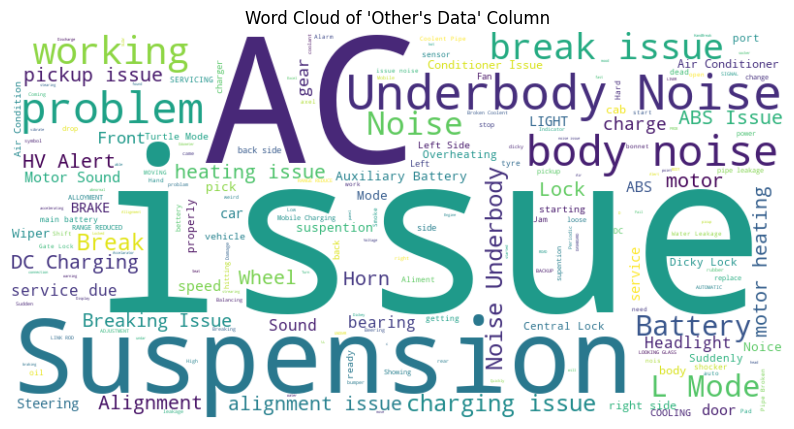

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Combine all text data into a single string
text_data = ' '.join(service["Other's Data"].dropna())

# Step 2: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Step 3: Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of 'Other's Data' Column")
plt.axis('off')
plt.show()


In [27]:
def classify_service(row):
    if isinstance(row, str) and ('charging' in row.lower() or 'dc' in row.lower()):
        return 'Charging'
    else:
        return None

# Apply the function to create a new column 'service_classified'

service['service_classified'] = service["Other's Data"].apply(classify_service)

# Replace the original column with NULL or empty string
service["Other's Data"] = ''


In [30]:
def classify_service(row):
    if isinstance(row, str) and ('Suspension' in row.lower()):
        return 'Suspension'
    else:
        return None

# Apply the function to create a new column 'service_classified'

service['service_classified'] = service["Other's Data"].apply(classify_service)

# Replace the original column with NULL or empty string
service["Other's Data"] = ''


In [33]:
service['service_classified']

0       None
1       None
2       None
3       None
4       None
        ... 
2319    None
2320    None
2321    None
2322    None
2323    None
Name: service_classified, Length: 2236, dtype: object